In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

(200, 2) (200,)


In [3]:
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

[0 1 2] [67 67 66]


In [4]:
import pandas as pd
clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target'] = y

print(clusterDF.shape)
clusterDF.head()

(200, 3)


/var/folders/lj/ms0l79910fz22cg2hchczhw40000gn/T/ipykernel_79233/1748033568.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


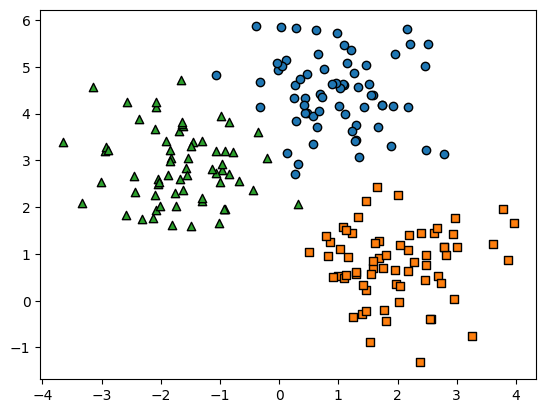

In [5]:
target_list = np.unique(y)
markers = ['o', 's', '^', 'P', 'D','H', 'x']

for target in target_list :
    target_cluster = clusterDF[clusterDF['target'] == target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolors='k', marker=markers[target])

plt.show()

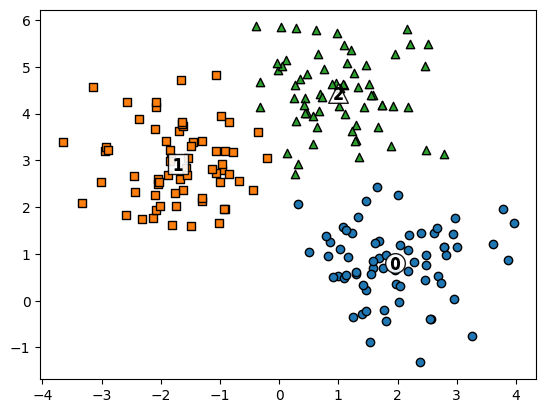

In [10]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

centers = kmeans.cluster_centers_ # 클러스터 중심값
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D','H', 'x']

for label in unique_labels :
    label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolors='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolors='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolors='k', marker='$%d$' % label)

plt.show()


In [11]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       2               66
        1                1
1       0               67
2       1               65
        0                1
Name: count, dtype: int64
